# **COVID 19 - Radiography Dataset** #


- **Source:** COVID-19 Radiography Database.
- **Classes:** COVID, Normal, Lung_Opacity and Viral Pneumonia.
- **Task:** Image Classification (X-ray images).

## **1. Dataset Setup** ##
The dataset is downloaded and copied into a writable directory to avoid read-only restrictions. The directory structure is then simplified by moving all images out of nested subfolders.

In [ ]:
#!pip install kagglehub
import kagglehub
path = kagglehub.dataset_download("tawsifurrahman/covid19-radiography-database")
print("Path to dataset files:", path)

In [ ]:
import os
print(os.listdir(path))

['COVID-19_Radiography_Dataset']


Moves images from `Class/images/` to `/Class/` to ensure compatibility with automated data generators.


In [ ]:
import shutil
import os

# Source directory, which is read-only
read_only_data_dir = os.path.join(path, 'COVID-19_Radiography_Dataset')

# Destination directory where we have write permissions
writable_base_dir = '/kaggle/working/COVID-19_Radiography_Dataset'

# Copy the entire dataset to a writable location
if not os.path.exists(writable_base_dir):
    print(f"Copying dataset from {read_only_data_dir} to {writable_base_dir}...")
    shutil.copytree(read_only_data_dir, writable_base_dir)
    print("Copying complete.")
else:
    print(f"Dataset already exists in {writable_base_dir}. Skipping copy.")

# Now, perform operations on the writable copy
data_dir = writable_base_dir

classes = ["COVID", "Normal", "Lung_Opacity", "Viral Pneumonia"]

for cls in classes:
    img_folder = os.path.join(data_dir, cls, "images")
    target_folder = os.path.join(data_dir, cls)

    if os.path.exists(img_folder):
        # Ensure target folder exists before moving, though it should already
        os.makedirs(target_folder, exist_ok=True)
        for img_file in os.listdir(img_folder):
            src_file = os.path.join(img_folder, img_file)
            dst_file = os.path.join(target_folder, img_file)
            # Use shutil.move to move the file
            shutil.move(src_file, dst_file)
        os.rmdir(img_folder)
        print(f"Class {cls} properly fixed")
    else:
        print(f"Warning: Image folder not found for class {cls} at {img_folder}. Skipping move operation for this class.")

Copying dataset from /root/.cache/kagglehub/datasets/tawsifurrahman/covid19-radiography-database/versions/5/COVID-19_Radiography_Dataset to /kaggle/working/COVID-19_Radiography_Dataset...
Copying complete.
Class COVID properly fixed
Class Normal properly fixed
Class Lung_Opacity properly fixed
Class Viral Pneumonia properly fixed


`masks` directories are removed to keep only the data necessary for the classification task and to avoid potential issues during data loading.

In [ ]:
for cls in classes:
    mask_folder = os.path.join(data_dir, cls, "masks")
    if os.path.exists(mask_folder):
        shutil.rmtree(mask_folder)
        print(f"Masks folder removed for class {cls}")

Masks folder removed for class COVID
Masks folder removed for class Normal
Masks folder removed for class Lung_Opacity
Masks folder removed for class Viral Pneumonia


In [ ]:
import os

for cls in ["COVID", "Normal", "Lung_Opacity", "Viral Pneumonia"]:
    cls_path = os.path.join(data_dir, cls)
    if os.path.exists(cls_path):
        files = [f for f in os.listdir(cls_path) if os.path.isfile(os.path.join(cls_path, f))]
        print(f"Class {cls}: {len(files)} images found.")
    else:
        print(f"Class {cls}: Folder not found!")

Class COVID: 3616 images found.
Class Normal: 10192 images found.
Class Lung_Opacity: 6012 images found.
Class Viral Pneumonia: 1345 images found.


## **2. Class Distribution** ##
The dataset contains:
- **3.616 COVID** images.
- **10.192 Normal** images.
- **6.012 Lung Opacity** images.
- **1.345 Viral Pneumonia** images.
- **21.165 X-ray** total images.

This distribution highlights a clear class imbalance, with the Normal class being the most represented and Viral Pneumonia the least.

In [ ]:
import os

data_dir = '/kaggle/working/COVID-19_Radiography_Dataset'

classes = ["COVID", "Normal", "Lung_Opacity", "Viral Pneumonia"]
total_images = 0

for cls in classes:
    cls_path = os.path.join(data_dir, cls)

    if os.path.exists(cls_path):
        images = [f for f in os.listdir(cls_path) if f.lower().endswith('.png')]
        count = len(images)
        total_images += count
        print(f"Class {cls:15}: {count} immages")
    else:
        print(f"Class {cls:15}: Folder not found!")

print(f"-------------------------")
print(f"Total Images: {total_images}")

Class COVID          : 3616 immages
Class Normal         : 10192 immages
Class Lung_Opacity   : 6012 immages
Class Viral Pneumonia: 1345 immages
-------------------------
Total Images: 21165


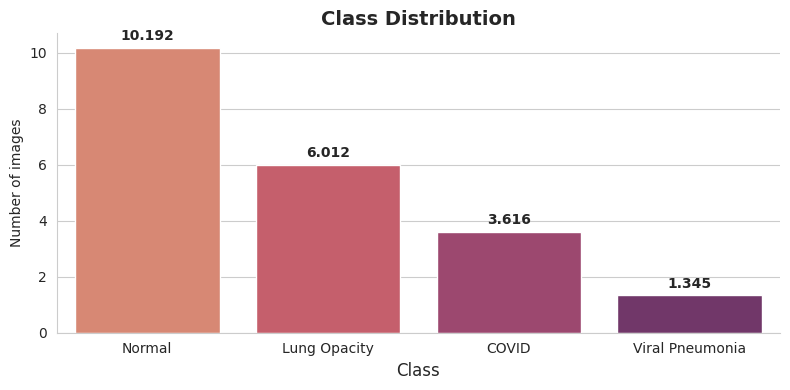

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data = {
    'Class': ['COVID', 'Normal', 'Lung Opacity', 'Viral Pneumonia'],
    'Images': [3.616, 10.192, 6.012, 1.345]
}

df = pd.DataFrame(data)

df = df.sort_values(by='Images', ascending=False)

plt.figure(figsize=(8, 4))
sns.set_style("whitegrid")

ax = sns.barplot(x='Class', y='Images', data=df, palette='flare', hue='Class')

for i in ax.containers:
    ax.bar_label(i, padding=3, fontsize=10, fontweight='bold')

plt.title('Class Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Class', fontsize=12)
plt.ylabel('Number of images', fontsize=10)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)

sns.despine()

plt.tight_layout()
plt.show()

These are examples of X-ray images from the four classes.

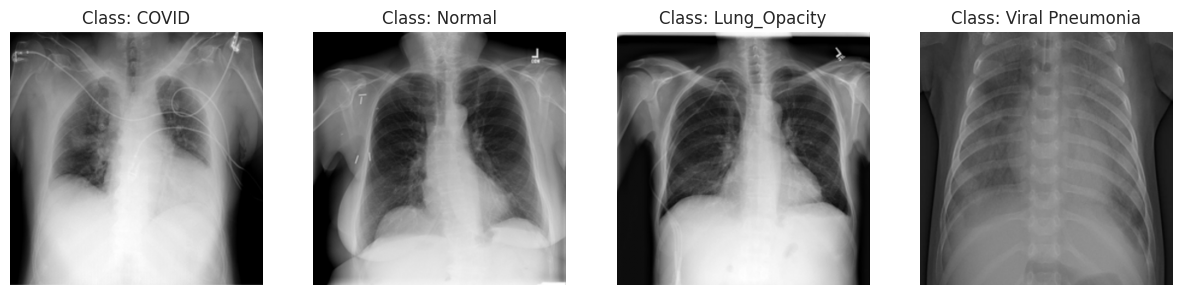

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

plt.figure(figsize=(15, 10))
for i, cls in enumerate(classes):
    cls_path = os.path.join(data_dir, cls)
    random_img = random.choice(os.listdir(cls_path))
    img = mpimg.imread(os.path.join(cls_path, random_img))

    plt.subplot(1, 4, i+1)
    plt.imshow(img, cmap='gray')
    plt.title(f"Class: {cls}")
    plt.axis('off')
plt.show()

## **3. Dataset Splitting** ##
The dataset is split into training, validation and test sets. Using **70%-15%-15% ratio** the images for each class are distributed across the three splits.
This ensures that the model is trained on a majority of the data, while separate validation and test sets are available to monitor performance and evaluate generalization.

In [ ]:
!pip install split-folders

import splitfolders
import os

input_folder = '/kaggle/working/COVID-19_Radiography_Dataset'
output_folder = '/kaggle/working/dataset_split'

splitfolders.ratio(input_folder, output=output_folder, seed=1337, ratio=(.7, .15, .15), group_prefix=None)

print("Split completed!")

Copying files: 21165 files [00:06, 3121.69 files/s]

Split completed!


In [ ]:
print(os.listdir(output_folder))

['train', 'val', 'test']


In [ ]:
import os
import pandas as pd

output_folder = '/kaggle/working/dataset_split'
classes = ["COVID", "Normal", "Lung_Opacity", "Viral Pneumonia"]
splits = ['train', 'val', 'test']

data = []

for split in splits:
    for cls in classes:
        cls_path = os.path.join(output_folder, split, cls)
        if os.path.exists(cls_path):
            count = len([f for f in os.listdir(cls_path) if f.lower().endswith('.png')])
            data.append({'Class': cls, 'Split': split, 'Count': count})

df = pd.DataFrame(data)
pivot_df = df.pivot(index='Class', columns='Split', values='Count')

pivot_df['Total Class'] = pivot_df.sum(axis=1)

print("Data Distribution Summary")
print(pivot_df)

print("\nData Splits Ratios")
totale_generale = pivot_df['Total Class'].sum()
per_split = pivot_df[['train', 'val', 'test']].sum()
print((per_split / totale_generale * 100).round(0).astype(str) + ' %')

Data Distribution Summary
Split            test  train   val  Total Class
Class                                          
COVID             543   2531   542         3616
Lung_Opacity      903   4208   901         6012
Normal           1530   7134  1528        10192
Viral Pneumonia   203    941   201         1345

Data Splits Ratios
Split
train    70.0 %
val      15.0 %
test     15.0 %
dtype: object


## **4. Preprocessing & Data Augmentation** ##
- **Validation & Test Set:** We only apply resizing (to ensure uniform images of $224 \times 224$ pixels) and normalization. We do not use augmentation here because we want to evaluate the model’s performance on "real-world" images as they are originally captured.

- **Training Set:** Together with resizing and normalization, we also apply **Data Augmentation** techniques such as random horizontal flips and rotations. This artificially increases the variety of our training data, helping the model generalize better and preventing overfitting.

- **Normalization:** Both sets are normalized using the standard ImageNet mean and standard deviation $(\mu=[0.485, 0.456, 0.406], \sigma=[0.229, 0.224, 0.225])$.


In [ ]:
from torchvision import transforms

IMG_SIZE = 224

# Preprocessing + Data Augmentation (training)
train_transforms = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(degrees=10),
    transforms.ColorJitter(brightness=0.1, contrast=0.1),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

# Preprocessing (validation and test)
val_test_transforms = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

## **5. Batching** ##
We implement a **Batch Size of 32**. Processing images one by one would be inefficient and extremely slow.
This approach strikes a balance between **computational speed** and **memory stability**, allowing the model to learn effectively without exhausting the system's resources.


In [ ]:
import os
from torch.utils.data import DataLoader
from torchvision import datasets

base_dir = '/kaggle/working/dataset_split'
train_dir = os.path.join(base_dir, 'train')
val_dir   = os.path.join(base_dir, 'val')
test_dir  = os.path.join(base_dir, 'test')

train_dataset = datasets.ImageFolder(root=train_dir, transform=train_transforms)
val_dataset   = datasets.ImageFolder(root=val_dir,   transform=val_test_transforms)
test_dataset  = datasets.ImageFolder(root=test_dir,  transform=val_test_transforms)

# Create DataLoader
# Batch size: 32
BATCH_SIZE = 32

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader   = DataLoader(val_dataset,   batch_size=BATCH_SIZE, shuffle=False)
test_loader  = DataLoader(test_dataset,  batch_size=BATCH_SIZE, shuffle=True)

print(f"Datasets loaded successfully!")
print(f"Train batches: {len(train_loader)} (Total immages: {len(train_dataset)})")
print(f"Val batches: {len(val_loader)} (Total immages: {len(val_dataset)})")
print(f"Test batches: {len(test_loader)} (Total immages: {len(test_dataset)})")

print(f"\nClasses {train_dataset.classes}")

Datasets loaded successfully!
Train batches: 463 (Total immages: 14814)
Val batches: 100 (Total immages: 3172)
Test batches: 100 (Total immages: 3179)

Classes ['COVID', 'Lung_Opacity', 'Normal', 'Viral Pneumonia']


The following images illustrate the results after applying normalization, resizing, and data augmentation.

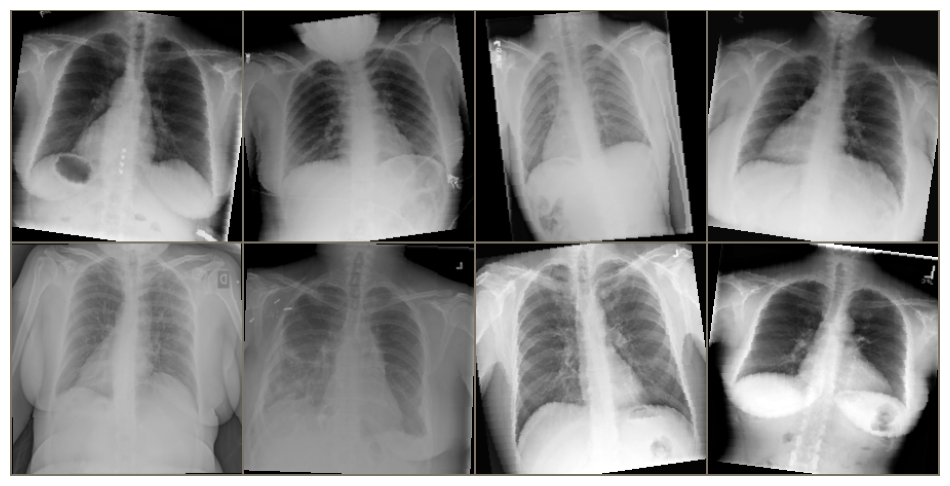

Labels: ['Normal', 'Normal', 'Normal', 'Lung_Opacity', 'COVID', 'Lung_Opacity', 'Normal', 'Normal']


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision

def imshow(img):
    img = img.clone()
    img[0] = img[0] * 0.229 + 0.485
    img[1] = img[1] * 0.224 + 0.456
    img[2] = img[2] * 0.225 + 0.406

    npimg = img.numpy()
    plt.figure(figsize=(12, 12))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')
    plt.show()

dataiter = iter(train_loader)
images, labels = next(dataiter)

img_grid = torchvision.utils.make_grid(images[:8], nrow=4)

imshow(img_grid)
print('Labels:', [train_dataset.classes[l] for l in labels[:8]])

## **6. Model Architecture** ##
**1. Feature Extraction (ResNet18):** We use ResNet18, a deep residual network pre-trained on the ImageNet dataset. By "freezing" the early layers, we preserve the model's ability to recognize basic shapes and textures (like edges and shadows), which it learned from millions of general images.

**2. Custom Classifier Head:** Since the original ResNet18 was designed to recognize 1.000 different objects, we replace the final Fully Connected (FC) layer with a new linear layer. This custom "head" is specifically tuned to output 4 classes (COVID, Normal, Lung Opacity, and Viral Pneumonia).

**3. Class Imbalance Handling (Weighted Loss):** Because our dataset is imbalanced, we use Weighted Cross-Entropy Loss. By assigning a higher weight to minority classes, we force the model to pay more attention to these rare cases during training, preventing it from simply favoring the most frequent category.

**4. Dropout (0.5):** Acts as a regularizer by randomly deactivating 50% of neurons during training.

**5. Adam Optimizer:** Is applied recursively to the new classifier's parameters with a learning rate of 0.0003.

In [ ]:
import torch
import torch.nn as nn
from torchvision import models
import torch.optim as optim
from sklearn.utils.class_weight import compute_class_weight

# Model Architecture
model = models.resnet18(weights='IMAGENET1K_V1')

for param in model.parameters():
    param.requires_grad = False

num_ftrs = model.fc.in_features
model.fc = nn.Sequential(
    nn.Linear(num_ftrs, 256),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(256, 4)
)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)


y_train = train_dataset.targets
classes = np.unique(y_train)
weights = compute_class_weight(class_weight='balanced',
                               classes=classes,
                               y=y_train)
# Weighted Loss
class_weights = torch.tensor(weights, dtype=torch.float).to(device)

criterion = nn.CrossEntropyLoss(weight=class_weights)

# Optimization
optimizer = optim.Adam(model.fc.parameters(), lr=3e-4)

print(f"Model configured and ready for training on:: {device}")
print(f"Class weights applied: {class_weights.tolist()}")

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:00<00:00, 192MB/s]


Model configured and ready for training on:: cuda
Class weights applied: [1.4632556438446045, 0.8801093101501465, 0.5191337466239929, 3.935706615447998]


## **7. Training Loop and Validation Phase** ##
**Train the model** on the training set and **evaluate its performance** on a validation set, preventing overfitting using **early stopping**.
- The model is trained for a maximum of **15 epochs**.
- During each epoch: the model learns from the training data and its performance is evaluated on the validation data.
- Loss and accuracy are tracked for both training and validation.
- The best model is saved.
- Training stops early if the validation loss does not improve for **3 consecutive epochs (patience = 3)**.

In [ ]:
import torch
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121

In [ ]:
epochs = 15
train_losses, train_accs = [], []
val_losses, val_accs = [], []

best_val_loss = float('inf')
patience = 3
trigger_times = 0

print(f"Starting Training and Validation for {epochs} epochs...")

for epoch in range(epochs):

    # Training
    model.train()
    running_loss = 0.0
    running_corrects = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        _, preds = torch.max(outputs, 1)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)

    epoch_train_loss = running_loss / len(train_dataset)
    epoch_train_acc = (running_corrects.double() / len(train_dataset)).item()
    train_losses.append(epoch_train_loss)
    train_accs.append(epoch_train_acc)

    # Validation
    model.eval()
    running_val_loss = 0.0
    running_val_corrects = 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            _, preds = torch.max(outputs, 1)

            running_val_loss += loss.item() * inputs.size(0)
            running_val_corrects += torch.sum(preds == labels.data)

    epoch_val_loss = running_val_loss / len(val_dataset)
    epoch_val_acc = (running_val_corrects.double() / len(val_dataset)).item()
    val_losses.append(epoch_val_loss)
    val_accs.append(epoch_val_acc)

    print(f'Epoch {epoch+1}/{epochs}:')
    print(f'  Train Loss: {epoch_train_loss:.4f} | Train Acc: {epoch_train_acc:.4f}')
    print(f'  Val Loss:   {epoch_val_loss:.4f} | Val Acc:   {epoch_val_acc:.4f}')

    # Early Stopping
    if epoch_val_loss < best_val_loss:
        best_val_loss = epoch_val_loss
        torch.save(model.state_dict(), 'best_model.pth') # Save the best
        trigger_times = 0
        print(f"Best Saved Model: (Val Loss: {epoch_val_loss:.4f})")
    else:
        trigger_times += 1
        print(f"  [Early Stopping Counter: {trigger_times}/{patience}]")

        if trigger_times >= patience:
            print(f"Early stopping triggered! Training stopped at epoch {epoch+1}")
            break

print("Process completed!")

Starting Training and Validation for 15 epochs...
Epoch 1/15:
  Train Loss: 0.8269 | Train Acc: 0.6432
  Val Loss:   0.5970 | Val Acc:   0.7711
Best Saved Model: (Val Loss: 0.5970)
Epoch 2/15:
  Train Loss: 0.6177 | Train Acc: 0.7311
  Val Loss:   0.5767 | Val Acc:   0.7815
Best Saved Model: (Val Loss: 0.5767)
Epoch 3/15:
  Train Loss: 0.5580 | Train Acc: 0.7565
  Val Loss:   0.5346 | Val Acc:   0.7900
Best Saved Model: (Val Loss: 0.5346)
Epoch 4/15:
  Train Loss: 0.5278 | Train Acc: 0.7655
  Val Loss:   0.5025 | Val Acc:   0.8023
Best Saved Model: (Val Loss: 0.5025)
Epoch 5/15:
  Train Loss: 0.5134 | Train Acc: 0.7728
  Val Loss:   0.4907 | Val Acc:   0.8083
Best Saved Model: (Val Loss: 0.4907)
Epoch 6/15:
  Train Loss: 0.5007 | Train Acc: 0.7768
  Val Loss:   0.4773 | Val Acc:   0.8175
Best Saved Model: (Val Loss: 0.4773)
Epoch 7/15:
  Train Loss: 0.5006 | Train Acc: 0.7772
  Val Loss:   0.4875 | Val Acc:   0.8146
  [Early Stopping Counter: 1/3]
Epoch 8/15:
  Train Loss: 0.4816 | Tra

## **8. Testing Phase** ##
In the final testing phase, the model is evaluated on the test set, which consists of completely unseen data. This step is crucial to determine the model's ability to generalize to new images and to obtain an unbiased measure of its final performance. The achieved **accuracy of 81.06%** indicates how the model is expected to perform in a real-world clinical setting.

In [ ]:
model.eval()
test_corrects = 0

print("Starting Testing Phase...")

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)

        test_corrects += torch.sum(preds == labels.data)

test_acc = test_corrects.double() / len(test_dataset)
print(f'Accuracy on Test Set: {test_acc:.4f}')

Starting Testing Phase...
Accuracy on Test Set: 0.8106


The training process was guided by an Early Stopping mechanism, which terminated the execution at **epoch 9**. By stopping here, we effectively **prevented the model from overfitting**, ensuring that we saved the weights that demonstrated the best generalization performance on unseen data.

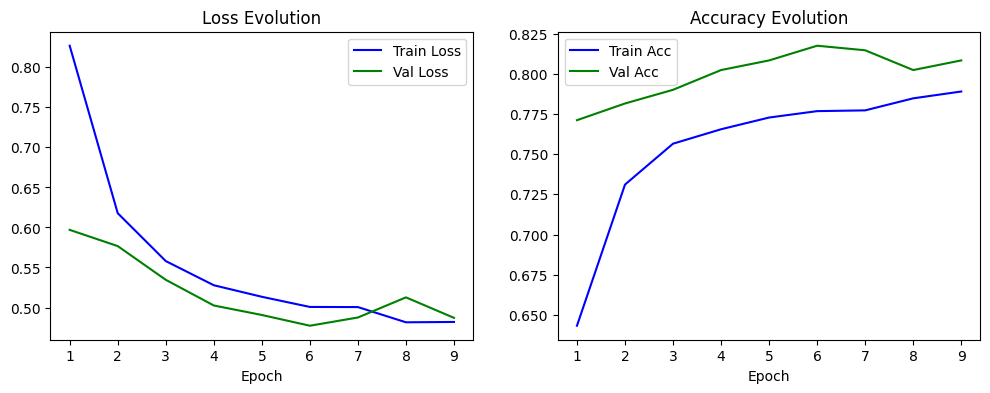

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_history(train_losses, val_losses, train_accs, val_accs):
    plt.style.use('default')
    epochs = range(1, len(train_losses)+1)
    plt.figure(figsize=(12, 4))

    # Grafico della Loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, label='Train Loss', color='blue')
    plt.plot(epochs, val_losses, label='Val Loss', color='green')
    plt.title('Loss Evolution')
    plt.xticks(epochs)
    plt.xlabel('Epoch')
    plt.legend()

    # Grafico dell'Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accs, label='Train Acc', color='blue')
    plt.plot(epochs, val_accs, label='Val Acc', color='green')
    plt.title('Accuracy Evolution')
    plt.xticks(epochs)
    plt.xlabel('Epoch')
    plt.legend()

    plt.show()

plot_history(train_losses, val_losses, train_accs, val_accs)

## **9. Analysis of Model Performance** ##
Looking at the Classification Report, the model shows exceptional performance in detecting **'Viral Pneumonia'** with a Recall of 0.98, meaning it **missed very few actual cases**.

The **Confusion Matrix confirms this robustness**, showing a strong diagonal trend, although some 'Normal' cases were occasionally misclassified as 'COVID' or 'Lung Opacity', which is a common challenge in medical imaging due to overlapping visual features.

In [ ]:
!pip install seaborn

Starting Testing Phase...
Testing completed! Generating report...

                 precision    recall  f1-score   support

          COVID       0.72      0.73      0.73       543
   Lung_Opacity       0.79      0.81      0.80       903
         Normal       0.88      0.82      0.85      1530
Viral Pneumonia       0.71      0.98      0.82       203

       accuracy                           0.81      3179
      macro avg       0.77      0.83      0.80      3179
   weighted avg       0.82      0.81      0.81      3179



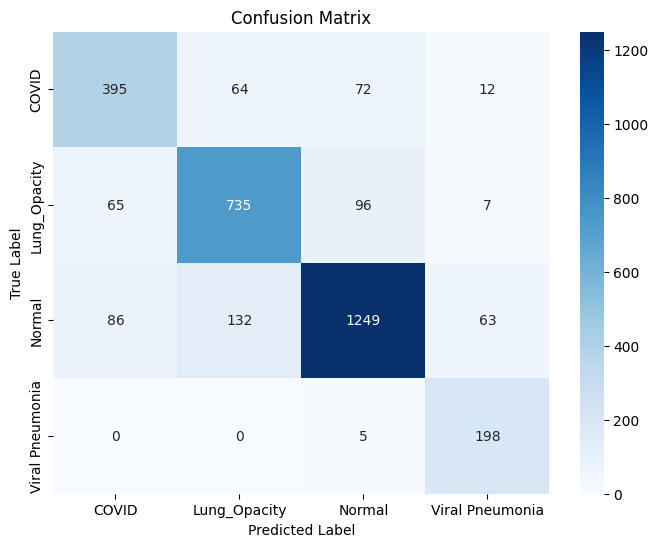

In [ ]:
import torch
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

model.eval()

all_preds = []
all_labels = []

print("Starting Testing Phase...")

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = model(inputs)

        _, preds = torch.max(outputs, 1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

print("Testing completed! Generating report...\n")

report = classification_report(all_labels, all_preds, target_names=train_dataset.classes)

print(report)

# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)

plt.figure(figsize=(8, 6))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=train_dataset.classes,
            yticklabels=train_dataset.classes)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

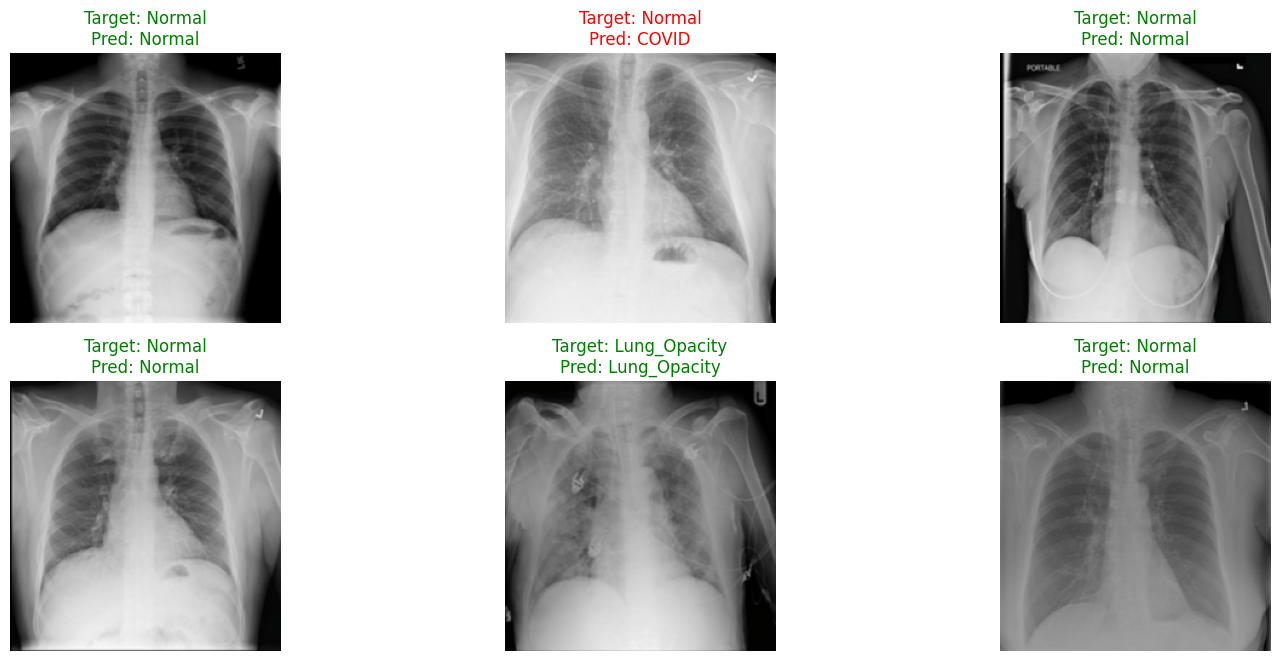

In [ ]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

def visualize_predictions(model, test_loader, num_images=6):
    model.eval()

    images, labels = next(iter(test_loader))
    images, labels = images.to(device), labels.to(device)

    # Predictions
    outputs = model(images)
    probs = F.softmax(outputs, dim=1)
    max_probs, preds = torch.max(probs, 1)

    rows = num_images // 3 + (1 if num_images % 3 != 0 else 0)
    plt.figure(figsize=(15, 5 * rows))

    for i in range(num_images):
        plt.subplot(3, 3, i+1)

        img = images[i].cpu().numpy().transpose((1, 2, 0))

        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        img = std * img + mean
        img = np.clip(img, 0, 1)

        color = 'green' if preds[i] == labels[i] else 'red'

        true_label = test_dataset.classes[labels[i]]
        pred_label = test_dataset.classes[preds[i]]
        confidence = max_probs[i].item() * 100

        plt.imshow(img)
        plt.title(f"Target: {test_dataset.classes[labels[i]]}\nPred: {test_dataset.classes[preds[i]]}", color=color)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

visualize_predictions(model, test_loader, num_images=6)

The following images show differences in the model’s performance:
- In the top example, the model **fails to correctly identify Lung Opacity** and instead predicts a Normal case, with very similar confidence scores (49.6% vs 46.9%).
- In contrast, the bottom example shows a correct classification of Lung Opacity with **high confidence (99.8%)**.

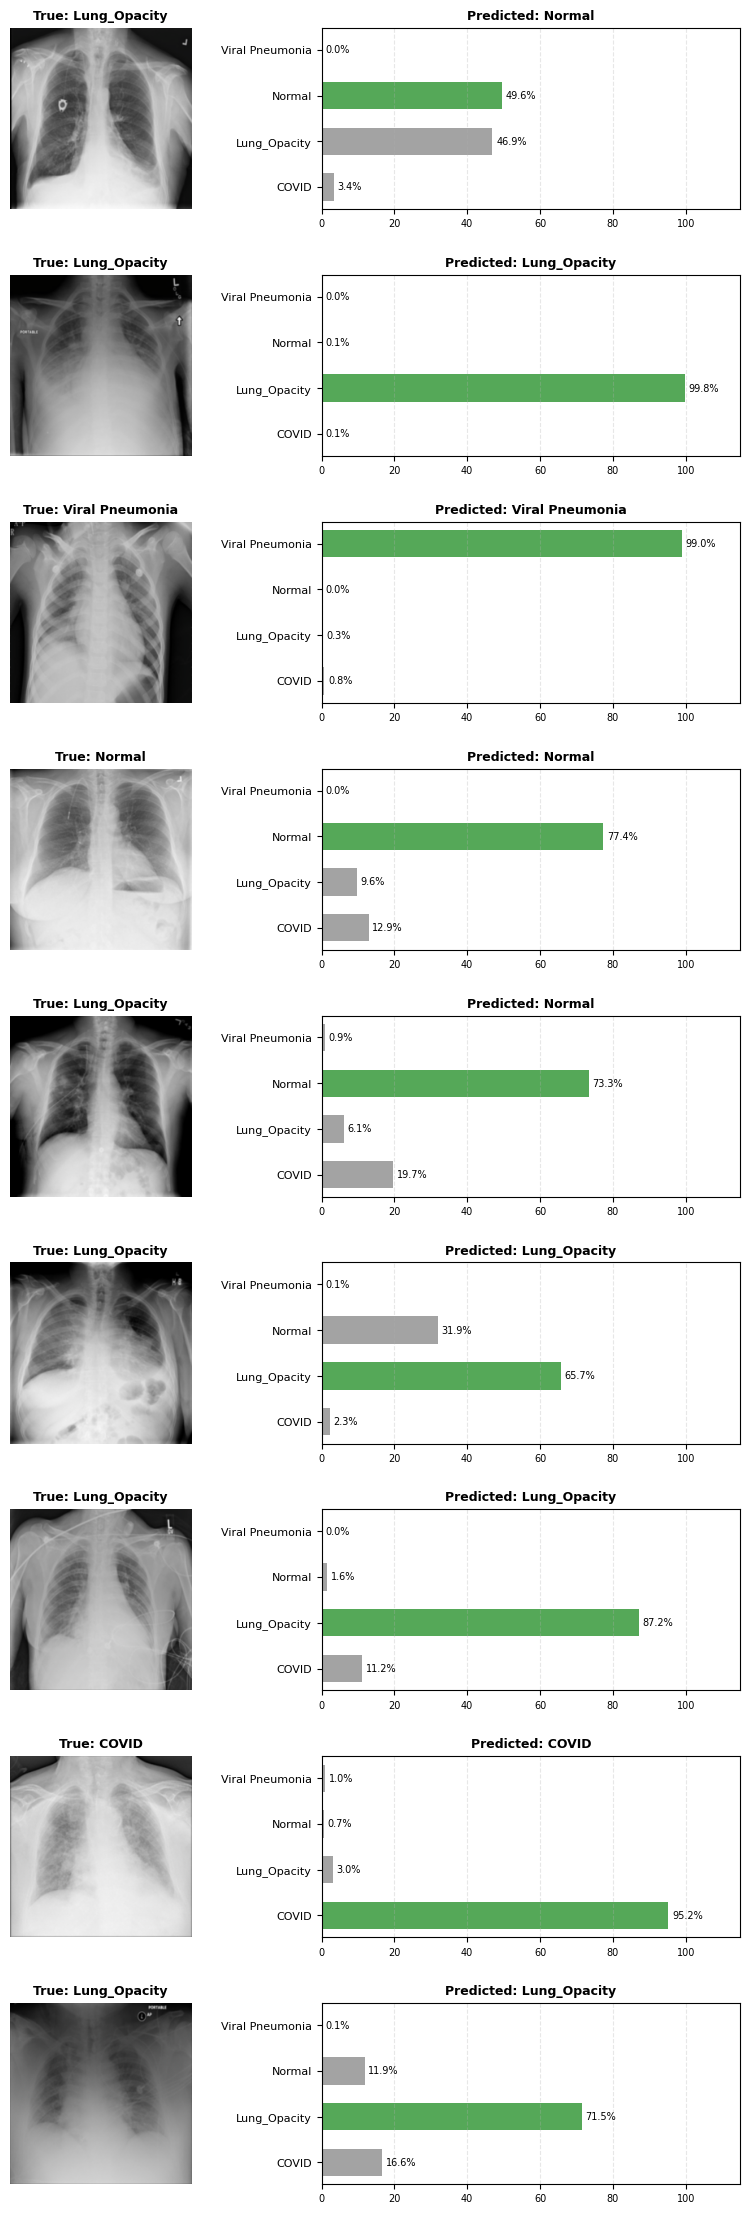

In [ ]:
def visualize_predictions(model, test_loader, num_images=9):
    model.eval()
    device = next(model.parameters()).device

    images, labels = next(iter(test_loader))
    images, labels = images.to(device), labels.to(device)

    with torch.no_grad():
        outputs = model(images)
        probs = F.softmax(outputs, dim=1)
        max_probs, preds = torch.max(probs, 1)


    fig, axes = plt.subplots(num_images, 2, figsize=(8, 2.5 * num_images),
                               gridspec_kw={'width_ratios': [1, 2]}) # 1 parte immagine, 2 parti grafico

    classes = test_dataset.classes

    for i in range(num_images):
        img = images[i].cpu().numpy().transpose((1, 2, 0))
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        img = np.clip(std * img + mean, 0, 1)


        ax_img = axes[i, 0]
        ax_img.imshow(img)
        ax_img.set_title(f"True: {classes[labels[i]]}", fontsize=9, fontweight='bold')
        ax_img.axis('off')


        ax_bar = axes[i, 1]
        y_pos = np.arange(len(classes))
        p_values = probs[i].cpu().numpy() * 100
        colors = ['#55a858' if j == preds[i] else '#a3a3a3' for j in range(len(classes))]

        bars = ax_bar.barh(y_pos, p_values, color=colors, height=0.6)
        ax_bar.set_yticks(y_pos)
        ax_bar.set_yticklabels(classes, fontsize=8)
        ax_bar.set_xlim(0, 115)
        ax_bar.set_title(f"Predicted: {classes[preds[i]]}", fontsize=9, fontweight='bold')

        for bar in bars:
            width = bar.get_width()
            ax_bar.text(width + 1, bar.get_y() + bar.get_height()/2,
                        f'{width:.1f}%', va='center', fontsize=7)

        ax_bar.tick_params(axis='x', labelsize=7)
        ax_bar.xaxis.grid(True, linestyle='--', alpha=0.3)

    plt.tight_layout(pad=2.0)
    plt.show()
visualize_predictions(model, test_loader, num_images=9)